# COMP541 - LAB #1

In this exercise, you’re supposed to preprocess and use the Boston Housing Dataset to perform linear regression and train a model that predicts the house prices given the attributes of an house.

The housing dataset has housing related information for 506 neighborhoods in Boston from 1978. Each neighborhood is represented using 13 attributes such as crime rate or distance to employment centers. The goal is to predict the median value of the houses given in $1000's.

## Exercise 0

In order to use some necessary functions, we need to import some modules and/or procedures,

In [ ]:
from urllib.request import urlretrieve
from urllib.error import HTTPError
import numpy as np

**urlretrieve** procedure allows us to download the data file. **NumPy** is a popular package which adds fast array/matrix operations to Python via its array structure **np.array**. NumPy also contains modules and functions for statistics (e.g. **np.mean**, **np.std**) and pseduo-random number generation (e.g. **np.random.randint**, **np.random.default_rng**).

First download, and then read the file. You need to download the data within Jupyter notebook (please have a look: **urlretrieve**, **open** functions of Python by typing e.g. **?urlretrieve**). If you look at the data, you see that each house is represented with 13 attributes separated by whitespaces and there are 506 lines in total. Here’s the [link](https://raw.githubusercontent.com/ilkerkesen/ufldl-tutorial/master/ex1/housing.data) to the dataset.

In [ ]:
def download_and_read(data_url):
    """
    download_and_read(data_url)

    First download the `data_url`, then read it into an array.
    """
    try:
        file_path, http_message = urlretrieve(data_url)
    except HTTPError:  # e.g. URL doesn't exist
        return None

    data = np.loadtxt(file_path)
    return data

housing_data = download_and_read("https://raw.githubusercontent.com/ilkerkesen/ufldl-tutorial/master/ex1/housing.data")

print("Testing download_and_read function.")
assert housing_data.shape == (506, 14)
assert np.isclose(housing_data.mean(), 66.67816985036704)
print('All tests passed.')

## Exercise 1

The resulting data matrix should have 506 rows representing neighborhoods and 14 columns representing the attributes. The last attribute is the median house price to be predicted, so let’s separate it. We will use NumPy’s array indexing operation to split the data array into input x and output y. (Hint: you may want to **np.reshape** y array into a matrix with size 506x1, use reshape procedure for this purpose) Note that, in this tutorial we are going to store instances in the rows, since the popular Python deep learning frameworks like PyTorch and TensorFlow do the same thing. So, it will change our matrix operations' order from **w * x** to **x * w**.

In [ ]:
def split_inputs_outputs(data):
    """
    split_inputs_outputs(data)

    Split it into two parts as inputs and outputs along the second axis.
    Second split is size of 1. Return both splits as 2-dimensional arrays.
    """
    # TODO: Use python array indexing/slicing operations to seperate the data into x and y matrices.
    # reshape y into 506,1 for easier processing later.

    # data: 506x14
    # x should be 506x13
    # y should be 506x1

    return x,y


x,y = split_inputs_outputs(housing_data)

print("Testing split_inputs_outputs function.")
assert x.shape == (506, 13)
assert y.shape == (506, 1)
assert np.isclose(x[0,:].mean(), 62.37687076923077)
assert y[122, 0] == 20.5
print('All tests passed.')

## Exercise 3
As you can see, input attributes have different ranges. We need to normalize attributes by subtracting their mean and then dividing by their standard deviation (hint: take means and standard deviations of column vectors). The mean and std functions calculate mean and standard deviation values of x. Calculate mean and standard deviation values. Perform normalization on input data. You can use mean() and std() functions of Numpy:
Ex. usage: mean = x.mean(axis=0)

In [ ]:
def normalize(x):
    """
        normalize(x)

    Take mean and standart deviation of `x` along the first axis. Subtract the mean from x and
    divide by standart deviation. Return the result.
    """
    # TODO: Calculate the mean and standard deviation of x
    # then normalize it by substracting the mean, and dividing by std.

    return x


x = normalize(x)

print("Testing normalize function")
assert x.shape == (506, 13)
assert np.isclose(x[122, :].mean(), -0.01051380557556349)
print("All tests passed.")

### *Important Note on Random Number Generation*
Before generating random numbers, strings etc., you need to set a seed, because NumPy uses a pseudo random number generator. In pseudo random number generators you set a seed and you obtain some certain random number generation order based on that seed. If you don’t set a seed, the results you obtain in the next exercises will be different. When you fail in some part, run the cells again starting from the cell or line we set random seed.

## Exercise 4
It is necessary to split our dataset into training and test subsets so we can estimate how good our model will perform on unseen data. There are 506 house in our dataset. Let’s take 400 of them randomly, use them as training data. Let the rest be test data. In the end, you will have 4 different arrays: xtrn, ytrn, xtst and ytst.

We will use **randperm** function to split our dataset into train and test sets. Note that, results will differ since usage of **randperm** function introduces randomness. If you want to overcome this randomness, set a seed by using **Random.seed!** function. In this exercise, we set seed as 1 just before **randperm** call and you need to take the first 400 random samples -not the last 400- as your training data, so that you will get exactly the same results. Use **@doc** macro to see documentation about **randperm** and **Random.seed!** (e.g. type **@doc randperm** to Julia REPL or notebook).

In [ ]:
def train_test_split(x, y, split_size=400):
    """
    train_test_split(x, y, split_size=400)

    Shuffle both `x` and `y` with same random permutation so that they correspond to each other
    on their second axis. Split both into two by `split_size`, return the splits.
    """
    num_examples = y.shape[0]
    rand_indexes = np.random.permutation(num_examples)

    # TODO: Partition the data into training and test sets. You can simply use python array indexing/slicing operations to do so.
    # First shuffle the data by using rand_indexes (you can use it as an index to shuffle the given array, python allows indexing by lists.)
    # Then take the first "split_size" of the array as the training data, rest as the test data.

    return xtrn, xtst, ytrn, ytst


np.random.seed(42)
xtrn, xtst, ytrn, ytst = train_test_split(x, y)

print("Testing train_test_split function.")
assert xtrn.shape == (400, 13)
assert xtst.shape == (106, 13)
assert ytrn.shape == (400, 1)
assert ytst.shape == (106, 1)
assert np.isclose(xtrn[122, :].mean(), 0.8119304085501324)
assert np.isclose(xtst[41, :].mean(), -0.2661499897093574)
assert ytrn[122, 0] == 8.8
assert ytst[41, 0] == 36.5
print("All tests passed.")

## Exercise 5
Our data is ready to be used. Let’s look at how good a randomly initialized linear regression model performs on our processed data.

Basically, we need to use some weights with whom we’re going to multiply the attributes of houses so that we can predict the price of that house. Neighborhoods are represented with 13 attributes and we need to predict the prices which is a single number. We need to have a weight matrices with size of 13x1. We also use a bias value which is 0.

To create weight matrix, we will sample from normal distribution with zero mean and a small standard deviation. In this tutorial, our standard deviation value is equal to 0.1. Use np.random.randn function to create a random weight matrix whose values are sampled from a unit normal distribution (mean=0, standard deviation=1). Multiply our weight matrix by 0.1 which is our desired standard deviation. We will not use bias in this part.

In [ ]:
def create_matrix(x=1, y=13, scale=0.1):
    """
    create_matrix(x=1, y=13, scale=0.1)

    Return a matrix of size (`x`, `y`) scaled by `scale`.
    """

    # TODO: create a weight matrix w with np.random.randn, that has a shape of (13,1), then multiply it with the scale

    return w


np.random.seed(1)
w = create_matrix()

print("Testing create_matrix method.")
assert w.shape == (13, 1)
assert np.isclose(w[3, 0], -0.10729686221561706)
print("All tests passed.")

Note that if you used any other operation that uses a seed after you used **np.random.permutation** function once in the previous exercise, your weight array will not be the same with the example. Please reset your seed and try again.

## Exercise 6
Now, we have input and weights. Let’s write a function to predict price. Implement the function takes weight matrix and neighborhood attributes as input and outputs a single value, house price prediction. Simply perform a matrix multiplication inside this function and return the output vector. You should use **@** operator to perform a matrix multiplication using NumPy arrays, or you can also use **np.matmul** function.

In [ ]:
def predict(w, x):
    """
    predict(w, x)

    Return the dot product of `w` and `x`.
    """
    # TODO: Return the dot product of x and w.

ypred = predict(w, xtrn)

print("Testing predict function")
assert ypred.shape == (400, 1)
assert np.isclose(ypred[122, 0], 2.659817742702329)
print("All tests passed.")

ypred is an 400x1 dimensional array/matrix. Each value in this array is the model’s price prediction for an average house in corresponding neighborhood.

## Exercise 7
Let’s implement a loss function which is called as Mean Squared Error (MSE),
![](https://github.com/OsmanMutlu/rawtext/raw/master/img/Comp541-Lab1-Screenshot7.png)
In this function we calculate J, our loss value, average of squared difference between real price values and predicted price values.

Implement MSE loss function which takes weight matrix, input matrix (xtrn or xtst) and ground truth prices (ytrn or ytst). Use the **predict** function you implemented above. Helpful functions/attributes: np.sum, np.mean, array.shape, np.abs. You don’t have to use all of them.

In [ ]:
def mse_loss(w, x, y):
    """
    mse_loss(w, x, y)

    Predict `x` using `w`. Calculate the loss of the predictions using `y`.
    """
    # TODO: Implement the MSE loss.
    # 1) use the model to get the prediction
    # 2) compare the ground truth (y) with the prediction and calculate the MSE loss.



train_loss = mse_loss(w, xtrn, ytrn)
test_loss = mse_loss(w, xtst, ytst)

print("Testing Loss")
assert np.isclose(train_loss, 302.36332258653687)
assert np.isclose(test_loss, 294.5122295907839)
print("All tests passed.")

## Exercise 8 - Closed Form Solution

**Normal Equation**

Gradient Descent is an iterative algorithm meaning that you need to take multiple steps to get to the Global optimum (to find the optimal parameters) but it turns out that for the special case of **Linear Regression**, there is a way to solve for the optimal values of the parameter theta to just jump in one step to the Global optimum without needing to use an iterative algorithm and this algorithm is called the Normal Equation. It works **only** for Linear Regression and not any other algorithm.

Normal Equation is the Closed-form solution for the Linear Regression algorithm which means that we can obtain the optimal parameters by just using a formula that includes a few matrix multiplications and inversions.

To calculate the optimal weight matrix W , we take the partial derivative of the MSE loss function with respect to W and set it equal to zero. Then, do a little bit of linear algebra to get the value of W.

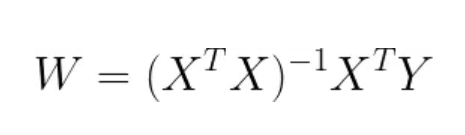

source: https://www.kaggle.com/code/aminizahra/linear-regression-closed-form

Implement a function that calculates the optimal W matrix for our problem, and test out linear regression model with these parameters to assess the results. You may use numpy.transpose() and numpy.linalg.inv() to get the transposed and inverted matrices respectively.

For additional information, you can check the following:
https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote08.html

https://www.kaggle.com/code/aminizahra/linear-regression-closed-form

https://medium.com/@ilgyrd/ordinary-least-squares-closed-form-solution-the-dart-way-d7c0ee0e0d02

In [ ]:
def closed_form_solution(x, y):
    """
    closed_form_solution(x, y)
    Calculate the optimal W matrix using the closed form solution formula for linear regression, using 'x' and 'y'
    """
    # Implement and return the closed form solution weights



optimal_w_trn = closed_form_solution(xtrn, ytrn)

train_loss = mse_loss(optimal_w_trn, xtrn, ytrn)
test_loss = mse_loss(optimal_w_trn, xtst, ytst)

print("Testing Loss")
print(train_loss)
print(test_loss)
assert np.isclose(train_loss, 265.86753884893267)
assert np.isclose(test_loss, 264.71798782255473)
print("All tests passed.")

# Exercise 9: Linear regression with Gradient Descent


In this step, we implement **Gradient Descent** to learn the weight matrix w for our linear regression model.

The goal is to minimize the **Mean Squared Error (MSE)** loss:

$L = (1/n) * Σ (y_i - ŷ_i)² = (1/n) * ||Xw - y||²$

The gradient of the loss with respect to the weights is:

$∇w L = (2/n) * Xᵀ (Xw - y)$

At each iteration, we update the weights using:

$w ← w - η ∇w L$

where $η$ is the learning rate.
We repeat this process for several epochs until the loss stops improving.

After training, we’ll compare the results with the **Closed-Form (Normal Equation)** solution to see how close the two approaches are.


In [ ]:
def grad_mse(w, x, y):
    """
    grad_mse(w, x, y)
    Gradient of MSE wrt weights for y_pred = x @ w .
    MSE = (1/n) * ||xw - y||^2  -> grad = (2/n) * X^T (Xw - y)
    """

    # TODO: Implement the gradient of MSE loss.



def gradient_descent(x, y, lr=0.05, epochs=3000, w_init=None, tol=1e-9, verbose=False):
    """
    - x: (n, d), y: (n, 1)
    - lr: learning rate
    - epochs: number of iterations
    - w_init: optional (d, 1) init; if None, random ~ N(0, 0.1)
    - tol: relative improvement tolerance for early stopping
    Returns:
      w        -> learned weights (d, 1)
      history  -> dict with 'train_loss' curve
    """
    if w_init is None:
        np.random.seed(1)
        w = create_matrix()
    else:
        w = w_init.copy()

    history = {'train_loss': []}
    prev_loss = np.inf

    for t in range(epochs):
        # forward

        # TODO: Forward pass and the loss calculation.
        loss =
        history['train_loss'].append(loss)


        # TODO: backward (gradient calculation) + update
        g =
        w =

        prev_loss = loss

        if verbose and (t % 500 == 0 or t == epochs - 1):
            print(f"epoch {t:4d} | train MSE: {loss:.6f}")

    return w, history

np.random.seed(1)
w0 = create_matrix()
w_gd, hist = gradient_descent(xtrn, ytrn, lr=0.05, epochs=4000, w_init=w0, tol=1e-10, verbose=True)

gd_train = mse_loss(w_gd, xtrn, ytrn)
gd_test  = mse_loss(w_gd, xtst, ytst)

cf_train = mse_loss(optimal_w_trn, xtrn, ytrn)
cf_test  = mse_loss(optimal_w_trn, xtst, ytst)

print("== Comparison ==")
print(f"Closed-form   -> train: {cf_train:.6f} | test: {cf_test:.6f}")
print(f"Gradient Des. -> train: {gd_train:.6f} | test: {gd_test:.6f}")
print(f"||w_gd - w_cf||_2: {np.linalg.norm(w_gd - optimal_w_trn):.6f}")
print(f"Last GD train loss: {hist['train_loss'][-1]:.6f}; epochs used: {len(hist['train_loss'])}")


# Visualization: Closed Form Solution vs Gradient Descent

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Pick one feature to visualize ---
cors = [np.corrcoef(xtrn[:, j], ytrn[:, 0])[0, 1] for j in range(xtrn.shape[1])]
best_j = int(np.argmax(np.abs(cors)))
print(f"Using feature #{best_j} for visualization")

# --- Prepare test data for that feature ---
x_feat = xtst[:, best_j]
y_true = ytst[:, 0]

# --- Compute predictions for test samples ---
y_pred_gd = predict(w_gd, xtst)[:, 0]
y_pred_cf = predict(optimal_w_trn, xtst)[:, 0]

# Gradient Descent Fit ---
plt.figure(figsize=(6,5))
plt.scatter(x_feat, y_true, color="blue", alpha=0.6, label="True data")

x_line = np.linspace(x_feat.min(), x_feat.max(), 200)
X_line = np.zeros((200, xtrn.shape[1]))
X_line[:, best_j] = x_line
y_line_gd = predict(w_gd, X_line)[:, 0]

plt.plot(x_line, y_line_gd, color="red", linewidth=2, label="GD Prediction line")
plt.xlabel(f"Feature #{best_j}")
plt.ylabel("Predicted / True Price")
plt.title("Linear Regression (Gradient Descent)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2️⃣ Closed-Form Fit ---
plt.figure(figsize=(6,5))
plt.scatter(x_feat, y_true, color="blue", alpha=0.6, label="True data")

y_line_cf = predict(optimal_w_trn, X_line)[:, 0]
plt.plot(x_line, y_line_cf, color="green", linewidth=2, label="Closed-form Prediction line")

plt.xlabel(f"Feature #{best_j}")
plt.ylabel("Predicted / True Price")
plt.title("Linear Regression (Closed-Form Solution)")
plt.legend()
plt.tight_layout()
plt.show()


# Gradient Descent with a trainable bias term

In [ ]:
def predict_affine(w, b, x):
    """
    y_hat = x @ w + b
    w: (d,1), b: scalar (float), x: (n,d)
    returns: (n,1)
    """
    return x @ w + b

def mse_loss_affine(w, b, x, y):
    """
    MSE = (1/n) * ||(x @ w + b) - y||^2
    """
    err = predict_affine(w, b, x) - y
    return (err**2).mean()

def grads_affine(w, b, x, y):
    """
    Gradients of MSE wrt w and b for y_hat = Xw + b
    ∇_w = (2/n) X^T (Xw + b - y)
    ∇_b = (2/n) sum(Xw + b - y)
    """
    n = x.shape[0]
    resid = (x @ w + b) - y          # (n,1)
    gw = (2.0 / n) * (x.T @ resid)   # (d,1)
    gb = float((2.0 / n) * resid.sum())  # scalar
    return gw, gb

def gradient_descent_affine(x, y, lr=0.05, epochs=3000, w_init=None, b_init=0.0,
                            tol=1e-9, verbose=True):
    """
    Full-batch GD for linear regression with a trainable bias.
    Returns: w, b, history
    """
    if w_init is None:
        np.random.seed(1)
        w = create_matrix()          # (d,1) ~ N(0,0.1)
    else:
        w = w_init.copy()
    b = float(b_init)

    history = {'train_loss': []}
    prev_loss = np.inf

    for t in range(epochs):
        loss = mse_loss_affine(w, b, x, y)
        history['train_loss'].append(loss)

        gw, gb = grads_affine(w, b, x, y)
        w -= lr * gw
        b -= lr * gb

        prev_loss = loss
        if verbose and (t % 500 == 0 or t == epochs - 1):
            print(f"epoch {t:4d} | train MSE: {loss:.6f} | b: {b:.4f}")

    return w, b, history

# ---- Train and evaluate (GD with bias) ----
np.random.seed(1)
w0 = create_matrix()
b0 = 0.0
w_gd, b_gd, hist = gradient_descent_affine(xtrn, ytrn, lr=0.05, epochs=4000,
                                           w_init=w0, b_init=b0, tol=1e-10)

gd_train = mse_loss_affine(w_gd, b_gd, xtrn, ytrn)
gd_test  = mse_loss_affine(w_gd, b_gd, xtst, ytst)
print(f"GD (with bias) -> train MSE: {gd_train:.6f} | test MSE: {gd_test:.6f}")
print(f"Learned bias b: {b_gd:.4f}")


In [ ]:
# Choose a single feature for 2-D view (most correlated with y on train)
cors = [np.corrcoef(xtrn[:, j], ytrn[:, 0])[0, 1] for j in range(xtrn.shape[1])]
best_j = int(np.argmax(np.abs(cors)))
print(f"Using feature #{best_j} for visualization")

x_feat = xtst[:, best_j]
y_true = ytst[:, 0]

# Prediction line: vary only that feature, keep others at mean (≈0 after normalization)
x_line = np.linspace(x_feat.min(), x_feat.max(), 200)
X_line = np.zeros((200, xtrn.shape[1]))
X_line[:, best_j] = x_line
y_line = predict_affine(w_gd, b_gd, X_line)[:, 0]

# Scatter + line
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(x_feat, y_true, alpha=0.6, label="True data")
plt.plot(x_line, y_line, linewidth=2, label="Prediction line (GD + bias)")
plt.xlabel(f"Feature #{best_j}")
plt.ylabel("House Price")
plt.title("Linear Regression Fit (Test Data)")
plt.legend()
plt.tight_layout()
plt.show()
